# MECH 309: Assignment 1, Question 1

Cagri Arslan

January 21, 2025

*All work can be found on https://github.com/imported-canuck/MECH-309*

In [73]:
# Imports
import numpy as np 
import math
from matplotlib import pyplot as plt

plt.style.use("bmh") # plotting style

### a)

We are given the force distribution $f(x)$ from $x=0$ to $x=\ell=24\, \mathrm{m}$ as:

\begin{equation}
f(x) = 205\left(\frac{x}{x+7}\right)\exp\!\left(-\frac{2x}{\ell}\right)\quad\mathrm{[N/m]}
\tag{1}
\end{equation}

We plot $f(x)$ with $\Delta x = 1\, \mathrm{m}$ 

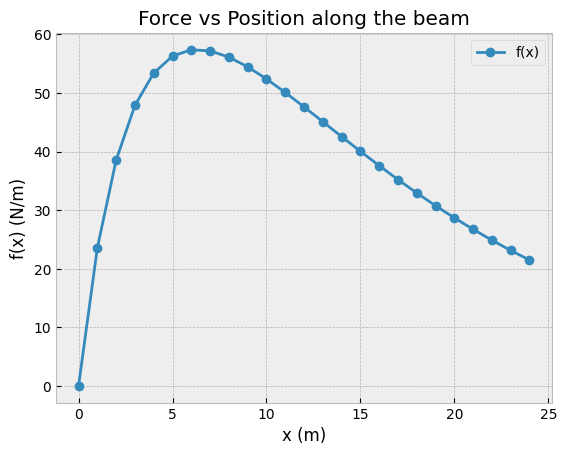

In [74]:
# Set variables
a = 0.0 # Lower bound
l = 24.0 # Length of mast
dx = 1.0 # Step size
x = np.arange(a, l+dx, dx) # x values from a to l with step size dx

f = 205*(x/(x+7))*np.exp(-2*x/l)

# Plotting
plt.plot(x, f, marker='o', label="f(x)")
plt.xlabel("x (m)")
plt.ylabel("f(x) (N/m)")
plt.title("Force vs Position along the beam") 
plt.legend()
plt.show()  

### b)

As $f(x)$ defines the force distribution, we must integrate it over the length of the member to compute the total force $F$. 

\begin{equation}
F = \int_{0}^{\ell} f(x) \,dx \quad\mathrm{[N]}
\tag{2}
\end{equation}

Likewise, as $dM = xf(x)\,dx$:

\begin{equation}
M = \int_{0}^{\ell} xf(x) \,dx \quad\mathrm{[Nm]}
\tag{3}
\end{equation}

We discretize and evaluate these integrals via the trapezoidal rule with $\Delta x = 1\mathrm{m}$ and $l = 24\mathrm{m}$. The trapezoidal rule is:
\begin{equation}
\int_{a}^{b} f(x) \approx \sum_{i=0}^{n-1} \frac{y_i+y_{i+1}}{2}\Delta x 
\tag{4}
\end{equation}

The function definitions for the force and moment distributions, and the script to approximate an integral through the trapezoidal rule are below:

In [75]:
# Function definitions for plots

def force_dist(x):
    """
    force distribution function f(x)
    """
    return 205*(x/(x+7))*np.exp(-2*x/l)

def moment_dist(x):
    """
    moment distribution function M(x) = x * f(x)
    """
    return x * force_dist(x)
    
def trapezoidal_integral(f, a, b, dx):
    """
    Numerically approximate the definite integral of f from a to b using the
    trapezoidal rule with subintervals of length l. 

    Inputs:
        f (function): The function to integrate
        a (float): Lower bound of integration
        b (float): Upper bound of integration
        dx (float): Length of each subinterval

    Returns:
        I (float): The approximate value of the definite integral
    """
    # x-values for sample points
    x = np.arange(a, b + dx, dx)
   
    # Evaluate the function at all sample points
    y = f(x)

    # Calculate the integral using the trapezoidal rule
    I = 0.0 # Initialize 
    for i in range(len(x) - 1): # for
        I += 0.5 * dx * (y[i] + y[i+1])
    return I


We can now evaluate the total force $F$ and total moment $M$. The code to compute this is shown below. Their outputs are as follows:  

$ F \approx 973.40\: \mathrm{N} $  
$ M \approx 10701.52\: \mathrm{Nm\: (clockwise)} $

In [76]:
# Compute F and M using trapezoidal rule script
F = trapezoidal_integral(force_dist, a, l, dx)
M = trapezoidal_integral(moment_dist, a, l, dx)

# Print out results (round to 2 units)
print(f"Total Force F ={F: .2f} N")
print(f"Total Moment M ={M: .2f} Nm")


Total Force F = 973.40 N
Total Moment M = 10701.52 Nm


### c)

In $\mathbb{R}^2$, we can solve for up to three independent unknowns $(H, V, T)$ by simultaneously solving the force- and moment balance system:

\begin{align}
\sum F_x = 0 \tag{5}\\
\sum F_y = 0 \tag{6}\\
\sum M_H = 0 \tag{7}
\end{align}

Equations (5) and (7) are completed in the problem statement. We derive equation (6) through simple observation: $V - T\cos\alpha = 0$, where positive is "down to up", and $\alpha$ is the angle between the shroud and mast. The complete system of equations is:

\begin{align}
F - H - T\sin\alpha &= 0 \tag{8}\\
V - T \cos\alpha &= 0 \tag{9}\\
T\ell\sin\alpha - M &= 0 \tag{10}
\end{align}

Rearranging:
\begin{align}
H + T\sin\alpha &= F \tag{11}\\
V - T \cos\alpha &= 0 \tag{12}\\
T\ell\sin\alpha &= M \tag{13}
\end{align}

We can form an equation of the form $\mathbf{A}\mathbf{x} = \mathbf{b}$ as such:
\begin{equation}
\begin{bmatrix}
1 & 0 & \sin\alpha\\
0 & 1 & -\cos\alpha\\
0 & 0 & \ell\sin\alpha
\end{bmatrix}
\begin{bmatrix}
H\\
V\\
T
\end{bmatrix}=
\begin{bmatrix}
F\\
0\\
M
\end{bmatrix}
\tag{14}
\end{equation}

Using $\sin\alpha = {2.5}/{\sqrt{24^2+2.5^2}}$ and $\cos\alpha = {24}/{\sqrt{24^2+2.5^2}}$, and recalling that $\ell = 24$, we can solve this system numerically. The code to compute this is shown below. Their outputs are as follows:  

$ H \approx 527.50\: \mathrm{N} $  
$ V \approx 4280.61\: \mathrm{N} $  
$ T \approx 4303.77\: \mathrm{N} $ 

In [77]:
# Code sin(a), cos(a) (as a does not have a clean form)
sina = 2.5/math.sqrt(24**2+2.5**2) # sin = opp/hyp
cosa = 24/math.sqrt(24**2+2.5**2)  # cos = adj/hyp

# Define matrix A and vector b in Ax = b
A = np.array([[1.0, 0.0, sina],
              [0.0, 1.0, -cosa],
              [0.0, 0.0, l*sina]])

b = np.array([F, 0, M])

# Solve for x
x = np.linalg.solve(A, b)

# Print out indices of x that represent H, V, T
print(f"H ={x[0]: .2f} N")
print(f"V ={x[1]: .2f} N")
print(f"T ={x[2]: .2f} N")


H = 527.50 N
V = 4280.61 N
T = 4303.77 N


### d)

We now recompute $F$ and $M$ using a modified step size of $\Delta x = 0.5\: \mathrm{m}$. All other parameters remain the same, and the step size is not hard coded, so we may simply re-define "dx" and run the same scripts. Afterwards, we use the modified $F$ and $M$ in the $\mathbf{A}\mathbf{x} = \mathbf{b}$ equation to numerically compute the new values of $H$, $V$, and $T$. The new values of the aforementioned are as follows:  

$ H \approx 529.38\: \mathrm{N} $  
$ V \approx 4281.05\: \mathrm{N} $  
$ T \approx 4304.21\: \mathrm{N} $ 

In [78]:
dx_new = 0.5

F_new = trapezoidal_integral(force_dist, a, l, dx_new)
M_new = trapezoidal_integral(moment_dist, a, l, dx_new)

b_new = np.array([F_new, 0, M_new])

x_new = np.linalg.solve(A, b_new)

print(f"New Total Force F ={F_new: .2f} N")
print(f"New Total Moment M ={M_new: .2f} Nm")

print(f"H ={x_new[0]: .2f} N")
print(f"V ={x_new[1]: .2f} N")
print(f"T ={x_new[2]: .2f} N")

New Total Force F = 975.32 N
New Total Moment M = 10702.62 Nm
H = 529.38 N
V = 4281.05 N
T = 4304.21 N


Now that we have computed $F$, $M$, $H$, $V$, $T$ using the new $\Delta x = 0.5\, \mathrm{m}$, we can determine the percent change between the new, more accurate values ($A_1$) and old, less accurate values ($A_2$) using the formula provided in the problem statement:

\begin{equation}
\mathrm{PC}=\frac{|A_1-A_2|}{|A_1|}
\tag{15}
\end{equation}  

Using this equation, we obtain the following percent changes for $H$, $V$, and $T$:  

$ \mathrm{PC}_H \approx 0.35439\: \% $  
$ \mathrm{PC}_V \approx 0.01019\: \% $  
$ \mathrm{PC}_T \approx 0.01019\: \% $  

While $\mathrm{PC}_H$ is greater than $\mathrm{PC}_V$ and $\mathrm{PC}_T$, all percent errors are fairly low. 

In [79]:
def percent_change(A1, A2):
    """
    Evaluates the percent change between two computations of a quantity A

    Inputs:
        A1 (float or np.array): The more accurate computation of A
        A2 (float or np.array): The less accurate computation of A

    Returns:
        pc (float): The percent change between A1 and A2 
    """
    return abs(A1-A2)/abs(A1) * 100

pc = percent_change(x_new, x)

print(f"Percent change of H ={pc[0]: .5f} %")
print(f"Percent change of V ={pc[1]: .5f} %")
print(f"Percent change of T ={pc[2]: .5f} %")

Percent change of H = 0.35439 %
Percent change of V = 0.01019 %
Percent change of T = 0.01019 %


We can analyze the percent change of $F$ and $M$ between $\Delta x = 1 \,\mathrm{m}$ and $\Delta x = 0.5 \,\mathrm{m}$ by applying equation (15) on the two computed pairs of $F$ and $M$. We consequently obtain the following percent changes for $F$ and $M$:  

$ \mathrm{PC}_F \approx 0.19701\: \% $  
$ \mathrm{PC}_M \approx 0.01019\: \% $  




In [80]:
pc_F = percent_change(F_new, F) # Compute percent change of F
pc_M = percent_change(M_new, M) # Compute percent change of M

print(f"Percent change of F ={pc_F: .5f} %")
print(f"Percent change of M ={pc_M: .5f} %")

Percent change of F = 0.19701 %
Percent change of M = 0.01019 %


Since $\mathrm{PC}_F$ and $\mathrm{PC}_M$ are low (both below 0.2%), this implies that using $\Delta x = 1\,\mathrm{m}$ does not induce significant errors as opposed to using $\Delta x = 0.5\,\mathrm{m}$. Hence, using a step size of $\Delta x = 1\,\mathrm{m}$ is likely acceptable for most applications. 